# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [99]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [83]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [9,39,158]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   6006  11093    18881    1159              7425          2098
1  56159    555      902   10002               212          2916
2   2861   6570     9618     930              4004          1682

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Possible wholesale customer establishments *by index number*:

- **0: Large grocery store** (large purchases of `Milk` and `Grocery` items - others relatively small)
- **1: Farmer's market** (very large `Fresh` purchases numbers - very low in Grocery and Detergents_Paper)
- **2: Corner convenience store** (low and balanced level of purchases across all items, with frozen lowest)



### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [84]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
DROP_ROW = 'Detergents_Paper'

new_data = data.copy()
new_data.drop(DROP_ROW, axis=1, inplace=True)

# TODO: Split the data into training and testing sets using the given feature as the target
# print data['Frozen']
X_train, X_test, y_train, y_test = train_test_split(new_data, data[DROP_ROW], test_size=0.25, random_state=99)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print "Remaining columns in data set can predict {} column values with R^2 of {}".format(DROP_ROW, round(score,3))

Remaining columns in data set can predict Detergents_Paper column values with R^2 of 0.85


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature relevant for identifying a specific customer?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I attempted to predict `Detergents_Paper` values and found that we could predict values for this column with extremely high accuracy (R<sup>2</sup>=0.85). This suggest to me that this feature is not relevant for identifying a specific customer, because you could potentially represent any customer's `Detergents_Paper` value as a combination of the same customer's other item purchases. The customer's `Detergents_Paper` purchase value doesn't provide much additional information on the customer.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

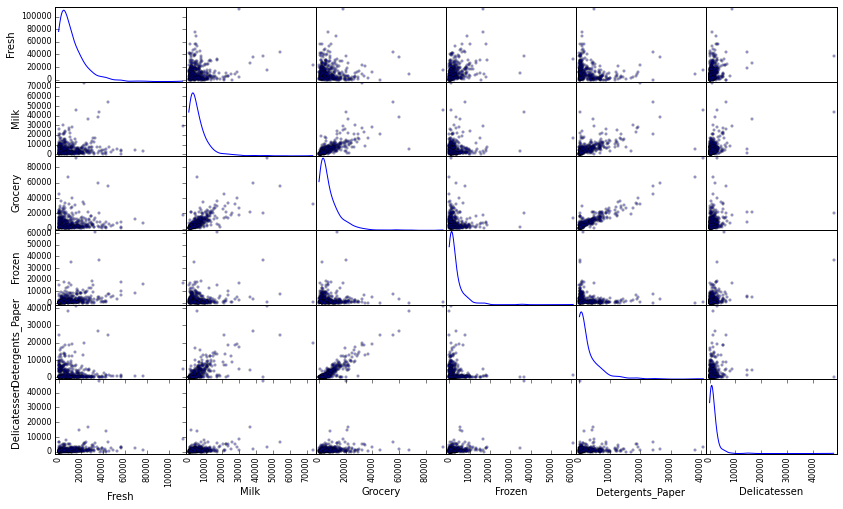

In [85]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

The pairs of `Detergents_Paper` and `Grocery` exhibit strong correlation, as do, to a lesser extent `Detergents_Paper` and `Milk`. This seems to be consistent with the calculation above showing that `Detergents_Paper` could be predicted accurately based on values for other items.

The data for these feature are not normally distributed - they show a spike at low values, with a long tail over higher quantities purchased.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

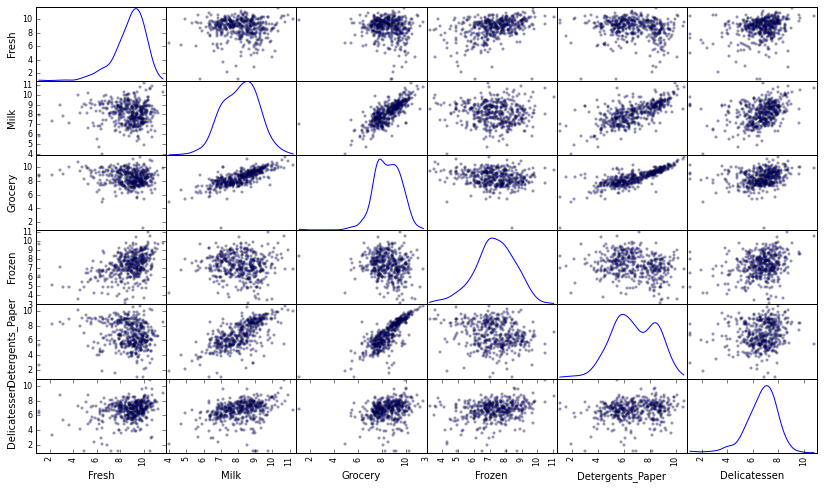

In [86]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [87]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   8.700514  9.314070  9.845911  7.055313          8.912608      7.648740
1  10.935942  6.318968  6.804615  9.210540          5.356586      7.977968
2   7.958926  8.790269  9.171392  6.835185          8.295049      7.427739

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [88]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data, 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data, 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers = [75,95,109,128,142,187,338]
outlier_raw_samples = pd.DataFrame(data.loc[outliers], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of outliers:"
display(outlier_raw_samples)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
66   2.197225  7.335634  8.911530  5.164786          8.151333      3.295837
95   1.098612  7.979339  8.740657  6.086775          5.407172      6.563856
96   3.135494  7.869402  9.001839  4.976734          8.262043      5.379897
218  2.890372  8.923191  9.629380  7.158514          8.475746      8.759669
338  1.098612  5.808142  8.856661  9.655090          2.708050      6.309918

Data points considered outliers for the feature 'Milk':


Empty DataFrame
Columns: [Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen]
Index: []

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75  9.923192  7.036148  1.098612  8.390949          1.098612      6.882437

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
38   8.431853  9.663261   9.723703  3.496508          8.847360      6.070738
65   4.442651  9.950323  10.732651  3.583519         10.095388      7.260523
420  8.402007  8.569026   9.490015  3.218876          8.827321      7.239215

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75    9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
122   9.410174  5.303305  5.501258  7.596392          3.218876      6.756932
142  10.519646  8.875147  9.018332  8.004700          2.995732      1.098612
154   6.432940  4.007333  4.919981  4.317488          1.945910      2.079442
161   9.428190  6.291569  5.645447  6.995766          1.098612      7.711101
177   9.453992  8.899731  8.419139  7.468513          2.995732      7.875119
204   7.578657  6.792344  8.561401  7.232010          1.609438      7.191429
237   9.835851  8.252707  6.385194  8.441176          3.332205      7.102499
289  10.663966  5.655992  6.154858  7.235619          3.465736      3.091042
338   1.098612  5.808142  8.856661  9.655090          2.708050      6.309918
356  10.029503  4.897840  5.384495  8.057377          2.197225      6.306275
402  10.186371  8.466531  8.535230  5.393628          2.302585      5.828946

Data points considered outliers for the feature 'Delicatessen':


Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
66    2.197225  7.335634   8.911530  5.164786          8.151333      3.295837
109   7.248504  9.724899  10.274568  6.511745          6.728629      1.098612
128   4.941642  9.087834   8.248791  4.955827          6.967909      1.098612
137   8.034955  8.997147   9.021840  6.493754          6.580639      3.583519
142  10.519646  8.875147   9.018332  8.004700          2.995732      1.098612
154   6.432940  4.007333   4.919981  4.317488          1.945910      2.079442
184   5.789960  6.822197   8.457443  4.304065          5.811141      2.397895
187   7.798933  8.987447   9.192075  8.743372          8.148735      1.098612
203   6.368187  6.529419   7.703459  6.150603          6.860664      2.890372
233   6.871091  8.513988   8.106515  6.842683          6.013715      1.945910
285  10.602965  6.461468   8.188689  6.948897          6.077642      2.890372
289  10.663966  5.655992   6.154858  7.235619          3.465736      3.091042

Chosen samples of outliers:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  20398   1137        3    4407                 3           975
1      3   2920     6252     440               223           709
2   1406  16729    28986     673               836             3
3    140   8847     3823     142              1062             3
4  37036   7152     8253    2995                20             3
5   2438   8002     9819    6269              3459             3
6      3    333     7021   15601                15           550

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

I removed all the data points in the outliers array having suspiciously anomalous values. All removed outliers featured the value 3 (or 1.099 in log form) for various categories including `Fresh`, `Grocery`, `Detergents_Paper` and `Delicatessen`. 

Besides being well outside our outlier step bounds and far different from the value range we would expect given the values for other categories for the same data point, the fact that these values are all exactly 3 suggests that they may be the result of a transcription error or a default imputed value. One entry (index - 75) showed the value of 3 for both `Grocery` and `Detergents_Paper`.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. 

In the code block below, you will need to implement the following:
 - Import `sklearn.preprocessing.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

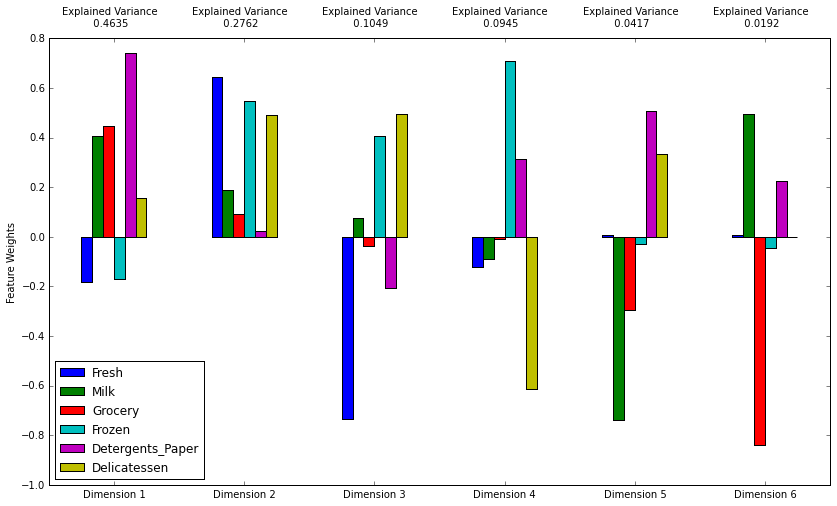

In [110]:
from sklearn.decomposition import PCA

# Note - the instructions here seem to be incorrect, as PCA is now part of the sklearn.decomposition library

# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

74% of the data variance is explained by the first two principal components. The third and fourth components explain an additional 20%. Thus the first four components explain 94% of total data variance. 

The first component is a combination of heavily weighted `Grocery`, `Milk` and `Detergents_Paper` features and less heavily weighted associated changes in the opposite direction with `Fresh` and `Frozen` purchases. I would describe this component as 'degree of non-perishable specialization', since both `Grocery` and `Detergents_Paper` are heavily weighted and opposited signed with `Fresh` and `Frozen`, which are very perishable. 

The second component, could be described as something like 'fresh product offerings', as `Fresh`, `Frozen` and `Delicatessen` features are heavily weighted with all features showing the same sign, and much more heavily weighted than `Grocery` or `Detergents_Paper`.

The third component could be described as 'Meat / Deli Specialization' with heavy spikes in `Frozen` and `Delicatessen`, with a oppositely signed spike in `Fresh`.

The fourth component might be an 'Ice Cream / Prepared Foods' specialization measure, with a big spike in `Frozen` with a large oppositely signed spike in `Delicatessen`.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [111]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       2.8608       0.6782       0.0155      -0.1974       0.0834   
1      -3.0701       2.5365       0.0519       0.0334       1.4601   
2       2.0279      -0.2032       0.4755      -0.2691       0.2838   

   Dimension 6  
0      -0.1010  
1       0.0919  
2       0.0732

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [112]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [113]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       2.8608       0.6782
1      -3.0701       2.5365
2       2.0279      -0.2032

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

K-Means clustering could be seen as a special case of Gaussian Mixture Models, where each point is forced to be assigned to the cluster to which it has the highest likelihood of belonging. 

Gaussian Mixture Models (GMM) are computationally more complex but provide more flexibility in allowing us to adjust thresholds for assigning points on the fringes of clusters or almost equidistant between clusters' centroids so that we have 'in-between' points or only partially assign these points to any one of the clusters. 

Using K-Means requires less memory and is easier to implement (as highlighted [here](https://pdfs.semanticscholar.org/8f59/01621bb1b914f452a5a6be03a56431463b0a.pdf)). In many cases it will yield results very similar to those obtained from GMM clustering, but may be more subject to 'false positives' in cluster assignment, as 'in-between' points have their assignment forced even if their likelihood of belonging to the assigned cluster is low.

Given how compactly we were able to reduce the dataset dimensionality through PCA (to basically 2 components), it seems that most data points should fall into a given cluster fairly easily seeing relatively low noise, and I would be comfortable simply using K-Means clustering.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [114]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
kmeans_clusterers =    [KMeans(n_clusters = 2),
                        KMeans(n_clusters = 3),
                        KMeans(n_clusters = 5)]

# TODO: Predict the cluster for each data point
# TODO: Find the cluster centers
kmeans_preds = []
centers = []
for c in kmeans_clusterers:
    kmeans_preds.append(c.fit_predict(reduced_data))
    centers.append(c.fit(reduced_data).cluster_centers_)
    
# TODO: Predict the cluster for each transformed sample data point
sample_preds = []
for c in kmeans_clusterers:
    sample_preds.append(c.predict(pca_samples))

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
for idx, c in enumerate(kmeans_preds):
    score = silhouette_score(reduced_data,c)
    print "The silhouette score for clustering with {} clusters is {}".format(kmeans_clusterers[idx].n_clusters,
                                                                                       round(score,3))

The silhouette score for clustering with 2 clusters is 0.426
The silhouette score for clustering with 3 clusters is 0.386
The silhouette score for clustering with 5 clusters is 0.352


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

As seen above, clustering with 2 clusters offers a silhouette score of 0.426, and expanding the clusters beyond 2 causes drops in the score - to 0.386 with 3 clusters, and 0.352 with 5 clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

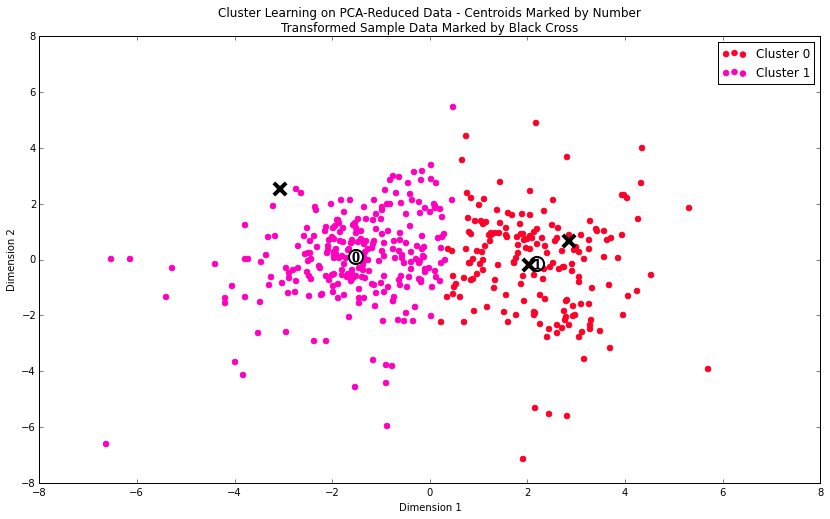

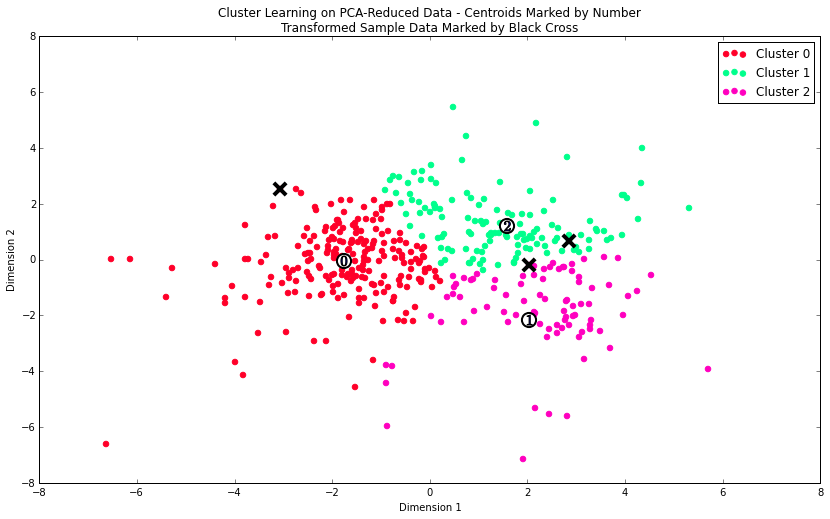

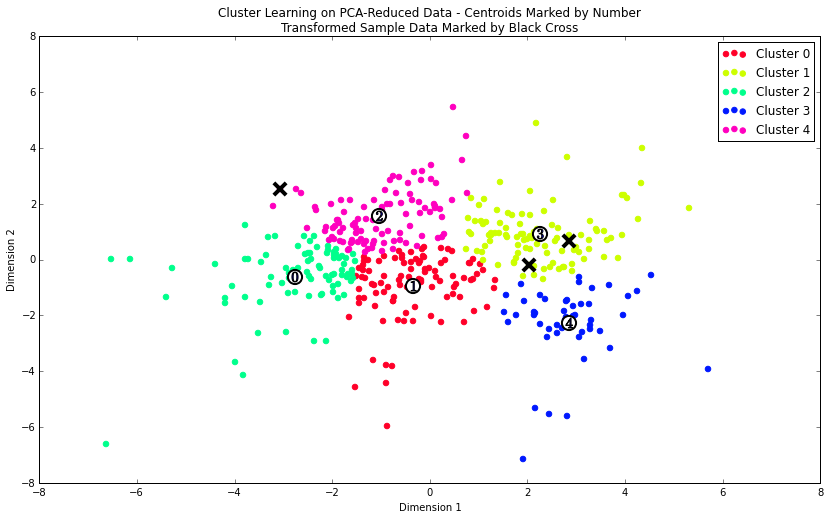

In [115]:
# Display the results of the clustering from implementation
#rs.cluster_results(reduced_data, preds, centers, pca_samples)

for idx, p in enumerate(kmeans_preds):
    rs.cluster_results(reduced_data, p, centers[idx], pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [116]:
# TODO: Inverse transform the centers

#The first element of `centers` is the centers array where kmeans = 2
log_centers = pca.inverse_transform(centers[0])

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i+1) for i in range(0,len(centers)-1)]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 1   9097  1858     2412    2021               299           689
Segment 2   3917  7976    12277     936              4672          1078

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

It looks like Segment 1 includes buyers we could call standard 'Large Grocery' stores, with much higher `Grocery`, `Milk` and `Detergents_Paper` purchase volumes.

In contrast, Segment 2 shows much lower purchase volumes for the categories above, but bigger spikes in `Fresh` and `Frozen` goods. This seems to suggest that Segment 2 stores are produce-focused markets and butcheries (as I assume `Frozen` includes frozen meats and fish). We could call this group 'Fresh Grocers'.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [117]:
# Display the predictions
for i, pred in enumerate(sample_preds[0]):
    print "Sample point", i, "predicted to be in Cluster", pred+1

Sample point 0 predicted to be in Cluster 2
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 2


**Answer:**

2 of my sample points (indices 0 and 2) fall into the 'Large Grocery' category, with much larger volumes of `Grocery`, `Milk` and `Detergents_Paper` purchases. The sample point index 1 is distinctly in the other category with lower purchases of the above items, but much higher volumes of `Fresh` and `Frozen` buying. 


## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

Based on the characteristics of buyer segments we've identified, I don't believe that the delivery schedule adjustment above would affect customers equally. Given that our Cluster 2 shows much higher purchase volumes of perishable `Fresh` and `Frozen` items, I suspect that companies in this group would be at much higher risk of having their business disrupted if receiving deliveries only 3 times a week as opposed to 5 times. 

I would consider conducting the A/B test first with companies in the 'Large Grocery' category (who buy relatively lower volumes of `Fresh` and `Frozen` items), or at the least highly restrict the treatment group size if testing with companies in the 'Fresh Grocers' group.

### Question 11
*Assume the wholesale distributor wanted to predict some other feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*

**Answer:**

The distributor could use all available category data for the buyers, including (or in place of individual category purchases) the segment labels we determined, as features against which he could fit the labels (or values) for the new feature he wanted to predict. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

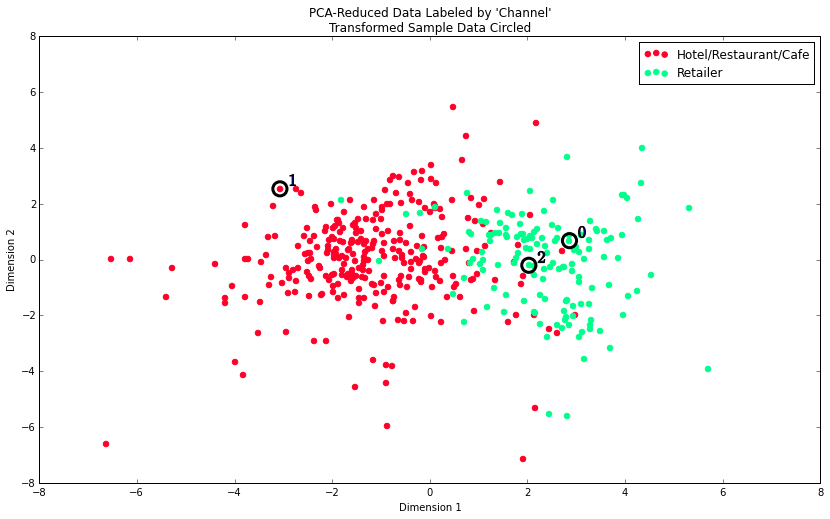

In [118]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The clustering outcome with the `Retailers` / `HoReCa` segments looks very similar to the one I previously determined, but simply differs in the labels attached to the clusters. The group I called 'Fresh Grocers' corresponds almost one-to-one with the `HoReCa` channel segment, and my 'Large Grocery' category looks largely the same as the `Retailers` segment cluster in the 2-dimensional map above. 

Had I more domain experience in the food service / retail industry, perhaps I would have better identified the nature of the clusters generated from the data. My sample data point classifications should be updated to move the two points in 'Large Grocery' to `Retailers` and the point in 'Fresh Grocer' to `HoReCa`. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

References:
    
https://pdfs.semanticscholar.org/8f59/01621bb1b914f452a5a6be03a56431463b0a.pdf<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html<br>
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html <br>
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


